From: https://w.wiki/6cNa

Wikidata link: [http://www.wikidata.org/entity/Q115941601](http://www.wikidata.org/entity/Q115941601)

Title: Falkenstraße 16, Hannover



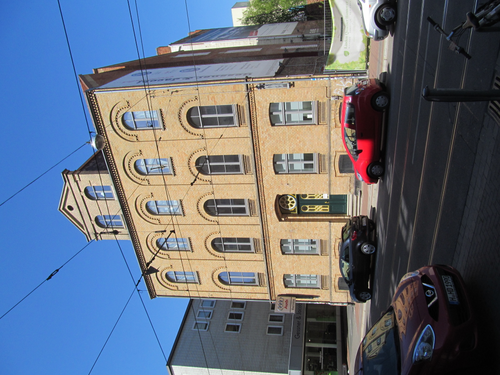




Wikidata link: [http://www.wikidata.org/entity/Q115960116](http://www.wikidata.org/entity/Q115960116)

Title: Am Lindener Berge 38, Hannover



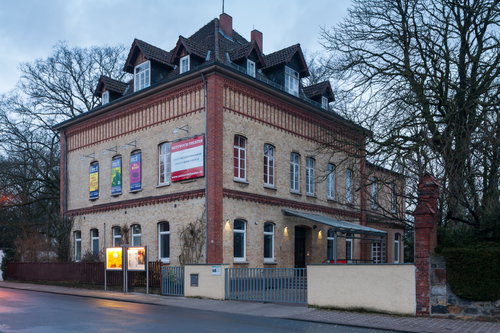




Wikidata link: [http://www.wikidata.org/entity/Q116057907](http://www.wikidata.org/entity/Q116057907)

Title: Charlottenstraße 88, Hannover



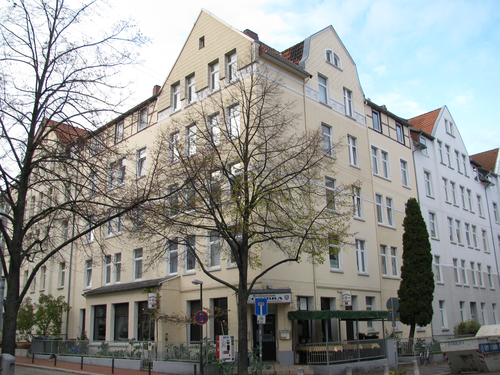




Wikidata link: [http://www.wikidata.org/entity/Q116045245](http://www.wikidata.org/entity/Q116045245)

Title: Ricklinger Straße 2, Hannover



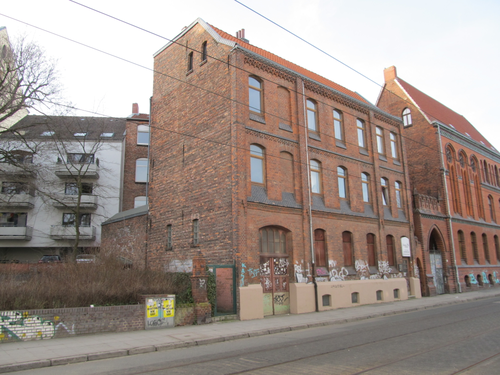




Wikidata link: [http://www.wikidata.org/entity/Q116047390](http://www.wikidata.org/entity/Q116047390)

Title: Allerweg 27, Hannover



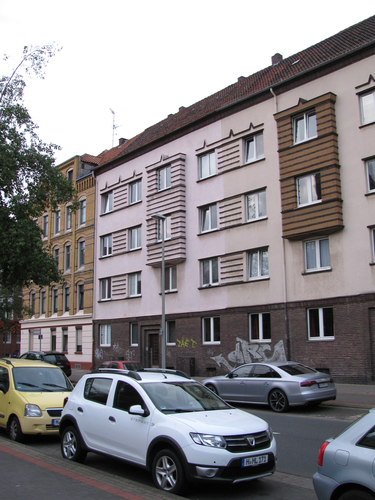




Wikidata link: [http://www.wikidata.org/entity/Q116047455](http://www.wikidata.org/entity/Q116047455)

Title: Laportestraße 24a, Hannover



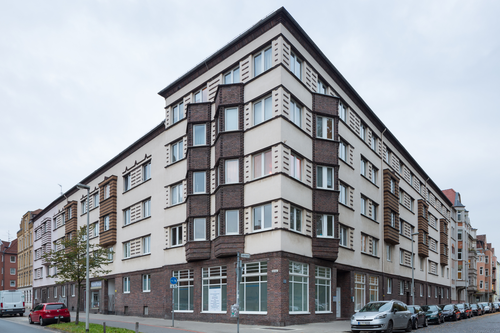




Wikidata link: [http://www.wikidata.org/entity/Q116057174](http://www.wikidata.org/entity/Q116057174)

Title: Haspelmathstraße 9, Hannover



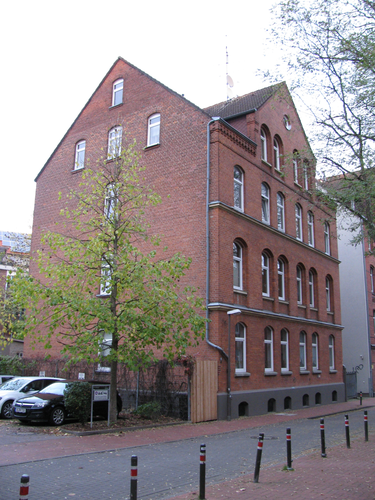




Wikidata link: [http://www.wikidata.org/entity/Q116057354](http://www.wikidata.org/entity/Q116057354)

Title: Ahrbergstraße 1 (facade), Hannover



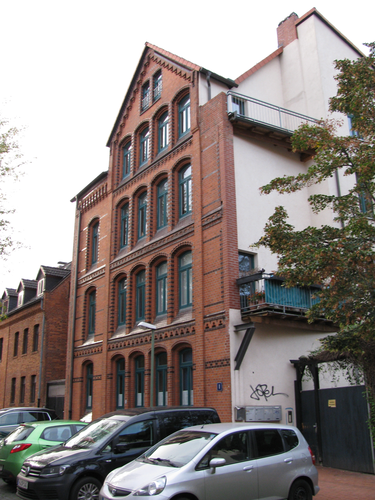




Wikidata link: [http://www.wikidata.org/entity/Q116057448](http://www.wikidata.org/entity/Q116057448)

Title: Ahrbergstraße 13, Hannover



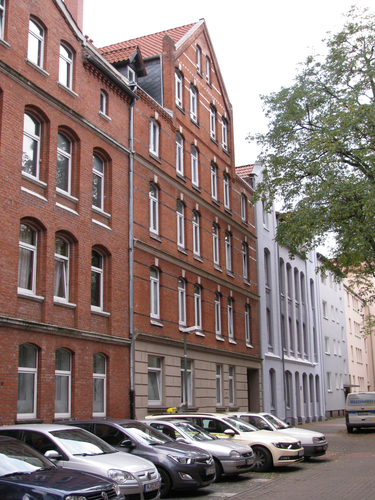




Wikidata link: [http://www.wikidata.org/entity/Q116057641](http://www.wikidata.org/entity/Q116057641)

Title: Charlottenstraße 81, Hannover



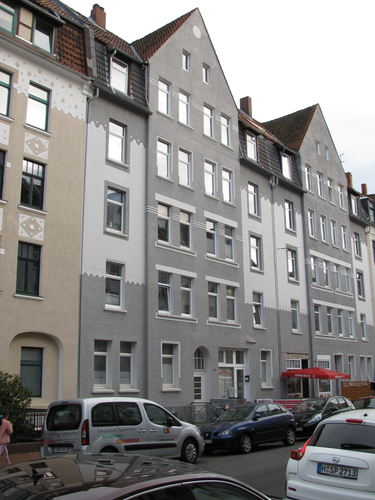




Wikidata link: [http://www.wikidata.org/entity/Q116057981](http://www.wikidata.org/entity/Q116057981)

Title: Charlottenstraße 94, Hannover



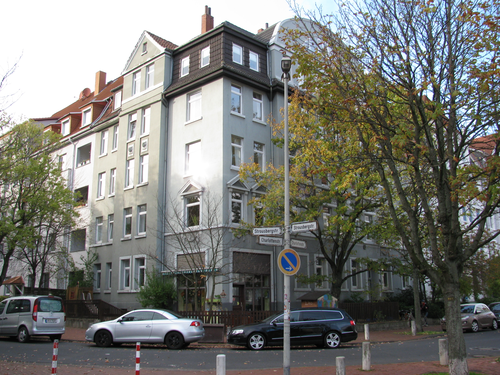




Wikidata link: [http://www.wikidata.org/entity/Q116058031](http://www.wikidata.org/entity/Q116058031)

Title: Tonstraße 2, Hannover



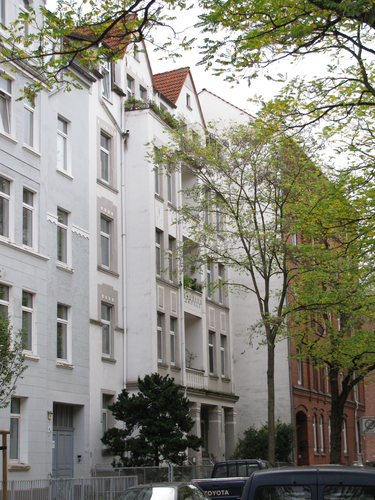




Wikidata link: [http://www.wikidata.org/entity/Q116121707](http://www.wikidata.org/entity/Q116121707)

Title: Menzelstraße 19, Hannover



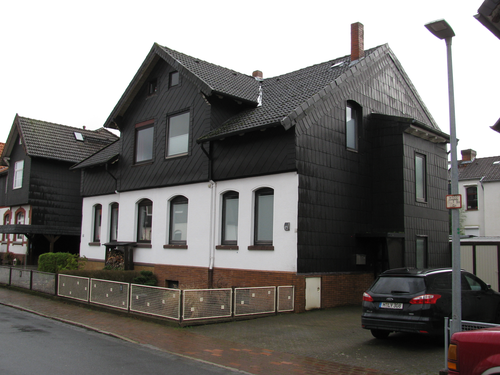




Wikidata link: [http://www.wikidata.org/entity/Q116121927](http://www.wikidata.org/entity/Q116121927)

Title: Menzelstraße 21, Hannover



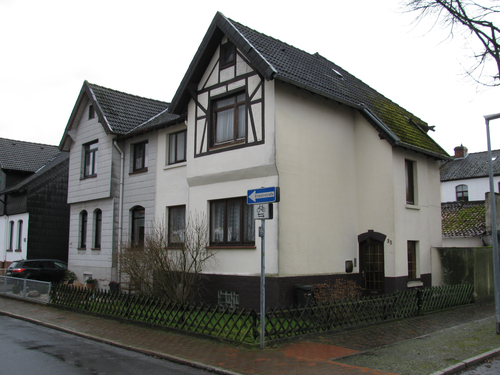




Wikidata link: [http://www.wikidata.org/entity/Q116122057](http://www.wikidata.org/entity/Q116122057)

Title: Menzelstraße 22, Hannover



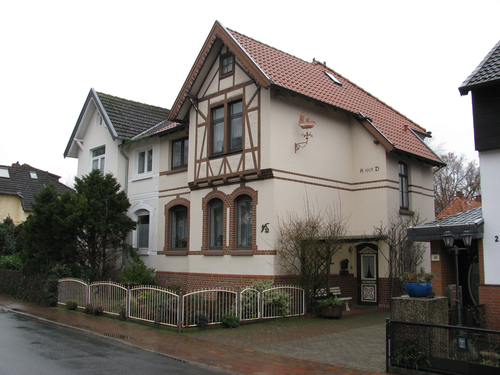

In [2]:
from SPARQLWrapper import SPARQLWrapper, JSON
from PIL import Image
import requests

# VARIABLES

sparql_endpoint_url = 'https://query.wikidata.org/bigdata/namespace/wdq/sparql'
wikibase_url = 'https://www.wikidata.org'
api_url = '/w/api.php'

# Wikidata requires a user agent header to prevent spam requests
user_agent = 'Ex_Books_conference_bot/0.0 (https://github.com/SimonXIX/Experimental_Books_workshop; ad7588@coventry.ac.uk)'

# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT DISTINCT ?item ?itemLabel ?image WHERE {
  ?item p:P7900 ?item_s_0Statement.
  ?item_s_0Statement ps:P7900 ?item_s_0.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
  OPTIONAL { ?item wdt:P18 ?image. }
}
LIMIT 15
"""

# SUBROUTINES

def get_delay(date):
    try:
        date = datetime.datetime.strptime(date, '%a, %d %b %Y %H:%M:%S GMT')
        timeout = int((date - datetime.datetime.now()).total_seconds())
    except ValueError:
        timeout = int(date)
    return timeout

def get_image(url, headers):
    r = requests.get(url, headers=headers, stream=True)
    if r.status_code == 200:
        im = Image.open(r.raw)
        return im
    if r.status_code == 500:
        return None
    if r.status_code == 403:
        return None
    if r.status_code == 429:
        timeout = get_delay(r.headers['retry-after'])
        print('Timeout {} m {} s'.format(timeout // 60, timeout % 60))
        time.sleep(timeout)
        get_image(url, headers)

def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()

# MAIN PROGRAM

results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    print('Wikidata link: ' + '[' + result['item']['value'] + ']' + '(' + result['item']['value'] + ')' + '\n')
    print('Title: ' + result['itemLabel']['value'] + '\n')

    # get image from image URL and display resized version
    image_url=result['image']['value']
    headers = {'User-Agent': 'Ex_Books_conference_bot/0.0 (https://github.com/SimonXIX/Experimental_Books_workshop; ad7588@coventry.ac.uk)'}
    im = get_image(image_url, headers)
    im.thumbnail((500, 500), Image.Resampling.LANCZOS)
    display(im)
    print('\n\n')

